# Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.

>>__Data description__<br>
>>● city: city this user signed up in<br>
>>● phone: primary device for this user<br>
>>● signup_date: date of account registration; in the form ‘YYYY MM DD’<br>
>>● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’<br>
>>● avg_dist: the average distance in miles per trip taken in the first 30 days after signup<br>
>>● avg_rating_by_driver: the rider’s average rating over all of their trips<br>
>>● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips<br>
>>● surge_pct: the percent of trips taken with surge multiplier > 1<br>
>>● avg_surge: The average surge multiplier over all of this user’s trips<br>
>>● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up<br>
>>● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise<br>
>>● weekday_pct: the percent of the user’s trips occurring during a weekday<br>

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [93]:
# load the data

with open('logins.json') as jsonfile:
    data = json.load(jsonfile)

# read the data as pd dataframe
login = pd.DataFrame(data)

# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### 1.1 Access the Data

In [7]:
login.info()
print()
print("login time distribution")
login.login_time.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB

login time distribution


1970-03-29 03:24:57    3
1970-01-06 21:45:52    3
1970-04-12 04:03:15    3
1970-03-14 17:45:52    3
1970-02-24 23:09:57    3
                      ..
1970-01-20 17:06:50    1
1970-03-29 05:16:45    1
1970-01-12 09:57:28    1
1970-01-18 04:29:46    1
1970-01-03 10:46:38    1
Name: login_time, Length: 92265, dtype: int64

### 1.2 Aggregate the Data

In [94]:
# aggregate the login with 15 mins interval

login["login_time"] = pd.to_datetime(login["login_time"], format="%Y-%m-%d")
login = login.set_index('login_time') 

# resample these login counts based on 15-minute time intervals
login_15T = login.copy()
login_15T['count'] = 1
login_15T=login_15T.resample('15T').count()

print("login counts statistics")
login_15T['count'].describe()

login counts statistics


count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: count, dtype: float64

### 1.3 Time Series Visualization

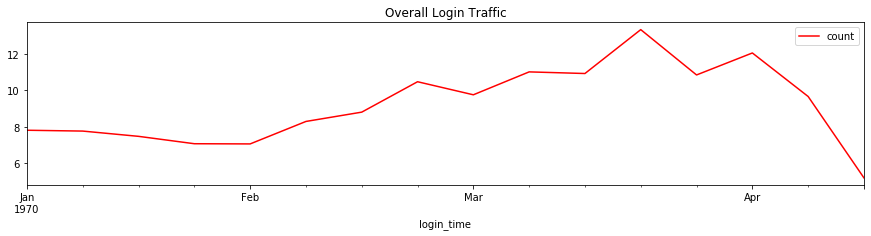

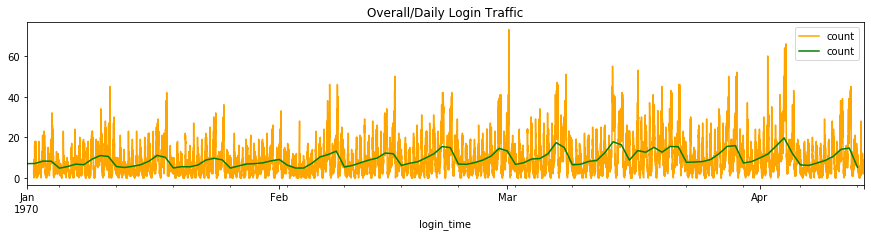

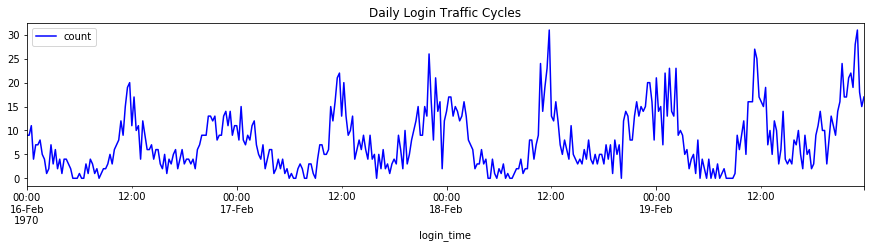

In [97]:
login_15T.resample('W').mean().plot(color='red', figsize=(15,3), title = "Overall Login Traffic")
ax = login_15T.plot(label='Login counts', color='orange', figsize=(15,3))
login_15T.resample('D').mean().plot(color='green', ax =ax, title = "Overall/Daily Login Traffic")
login_15T['1970-02-16':'1970-02-19'].plot(color='blue', figsize=(15,3), title = "Daily Login Traffic Cycles")
plt.show()

# Summary
1. The raw data contains __distinct login traffic data at each time point__, at a given data point - it happens multiple records exist. Without further info on how these data are collected, we won't be taking extra processing on this.
2. The __Overall Login Traffic__ plot shows the pattern that the login counts is increasing and reaches it's peak at the middle May then starts to drop and goes down at the end of the April.
3. The __Overall/Daily Login Traffic__ shows a daily cycle over the whole login period - a closer look reveals a daily cycle, which confirmed by the plot of last one as __Daily Login Traffic Cycles__. The trends indicates the daily pattern reach the top at the beginning of the day(00:00am) and reach the peach again at the noon(12:00pm).

# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
          a. how you will implement the experiment
          b. what statistical test(s) you will conduct to verify the significance of the observation
          c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.


# Discussion

In the case described above, We can take a look at the changes in the interaction of drivers between two cities, more specifically, a couple of __metrics__ would be helpful are:

       - The count of visiting drivers from the other city;
       - The average amount of time spending in this city for the driver from the other side.
       
      
Let's say divers belong to the Ultimate Gotham, and after the experiment in encouraging driver partners to serve both cities, we would expect the total driver counts, and the average time they spend at the Metropolis should be increasing. And the same for the drives from Ultimate Metropolis - they should have more engagement in the Ultimate Gotham.


To further implement a practical experiment to test the results, let's discuss how to measure the key metrics. To pass the toll bridge, usually a stop is settled already for the info recording. According to the driver's license, it's easy to know the city they belong to. Hence, each time a driver passes the bridge, we record their driver's license or their car license, the time they enter, and the time they pass the stop again to drive way back to their own city. Now we can access to the daily driver enter count and the time interval they spend in the other city.


In order to test the reimbursing effect, we can randomly choose 1,000 drivers from each city, and for each group, we offer the reimbursing coupon for 500 drivers. By separating the driver in each group of drivers randomly in half with or without the coupon, we can conduct an A/B test. This allows us to evaluate the key metrics proposed above for each group by comparing the experiment and control with the toll reimbursement offer as the only variable. What's more, by specifying the sample size(500), we can propose the statistical significant level $\alpha\ as 0.05. And taking the typical previous driver passing count and the average time as well, we can use the A/B test calculator to estimate the time we need to reach a significant level.
Noted that by doing this, we will be able to attenuate the other confounder such as workday vs. weekend and weather conditions and etc. 


__Null Hypothesis__: $$H_0: \mu_(experiment) - \mu_(control) = 0$$
__Alternative Hypothesis__: $$H_a: \mu_(experiment) - \mu_(control) > 0$$


After collecting the data, we can use the $t$-statistics to calculate the results to get the $p$-value.


__Interpretation__: If $p$-value is smaller than the significance level for either one group then there's evidence to indicate that the results are in favor of the Alternative Hypothesis, which means the success of this experiment in encouraging driver partners to serve both cities. And the experiment and the $p$-value along with the confidence interval, power of the statistical tests should be present to the city operation team for further decision-making on whether they should implement the toll reimbursement or not.


__Note__: It could be possible that the difference is only significant in one group.
For instance, Ultimate Gotham is mostly active at night. with the reimbursement offer, Gotham drivers might be willing to go to the Ultimate Metropolis during the day for more riders, resulting in a significant difference in Gotham drivers group. Whereas Ultimate Metropolis is mostly active during the day, which means even though with the reimbursement offer, Gotham drivers still are not willing to serve city Gotham, in this case, we may not obtain a significant difference for Gotham drivers.

# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
  1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
  2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
  3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

# Data Cleaning

In [246]:
#load the data
with open('ultimate_data_challenge.json') as jsonfile:
    data = json.load(jsonfile)
user = pd.DataFrame(data)
########################

# dataset info
print("----------- RAW DATA INFO -----------")
user.info()

print()
print()

# preview the dataset
print("----------- RAW DATA PREVIEW -----------")
user.head()


----------- RAW DATA INFO -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


----------- RAW DATA PREVIEW ---------

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [249]:
################## Data Cleaning #######################
# convert datetime format
date_col = ['last_trip_date', 'signup_date']
for col in date_col:
    user[col] = pd.to_datetime(user[col], format='%Y-%m-%d')

# fill in missing values as 'unknown' for column `phone`
user.phone = user.phone.fillna('unknown')

# impute missing values with median
for col in ['avg_rating_by_driver', 'avg_rating_of_driver']:
    user[col] = user[col].fillna(user[col].median())

# Add the retained customers
threshold = user.last_trip_date.max() - pd.Timedelta('30 days')
user['retained_user'] = user.last_trip_date.apply(lambda x: 1 if x >= threshold else 0)

# Add the time active
user['time_active'] = user.last_trip_date - user.signup_date
user['time_active'] = user.time_active.dt.days


################## Data Summary #######################

#print the category features summary
print("_____________DATA SUMMARY - AFTER CLEANING_____________")
print()
print("----- Categorical Features Summary -----")
for col in ['city', 'phone', 'ultimate_black_user', 'retained_user']:
    print()
    user[col] = user[col].astype('category')
    print("**** {} ****\n".format(col),user[col].value_counts(normalize = True))

#print the numeric features summary
print()
print()
print("------------------------ Numeric Features Summary ------------------------")
num_col=["trips_in_first_30_days", "avg_rating_by_driver", "avg_rating_of_driver",
         "avg_surge", "surge_pct", "weekday_pct", "avg_dist", "time_active"]
user[col] = user[col].astype('float')
print(round(user.loc[:,num_col].describe(),2))

#print the datetime features summary
print()
print()
print("------ Time Features Summary ------")
for col in ['last_trip_date', 'signup_date']:
    print()
    print("**** {} ****\n".format(col), user[col].describe())


_____________DATA SUMMARY - AFTER CLEANING_____________

----- Categorical Features Summary -----

**** city ****
 Winterfell        0.46672
Astapor           0.33068
King's Landing    0.20260
Name: city, dtype: float64

**** phone ****
 iPhone     0.69164
Android    0.30044
unknown    0.00792
Name: phone, dtype: float64

**** ultimate_black_user ****
 False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

**** retained_user ****
 0    0.62392
1    0.37608
Name: retained_user, dtype: float64


------------------------ Numeric Features Summary ------------------------
       trips_in_first_30_days  avg_rating_by_driver  avg_rating_of_driver  \
count                50000.00              50000.00              50000.00   
mean                     2.28                  4.78                  4.65   
std                      3.79                  0.45                  0.58   
min                      0.00                  1.00                  1.00   
25%                

# Exploratory Data Analysis

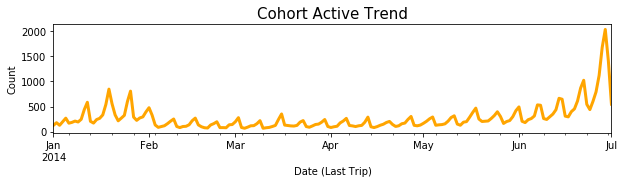

In [167]:
user_plot = user.copy()
user_plot.set_index('last_trip_date').resample('D').size().plot(color='orange', figsize=(10,2), linewidth =3)
plt.title("Cohort Active Trend", size = 15)
plt.ylabel("Count")
plt.xlabel("Date (Last Trip)")
plt.show()

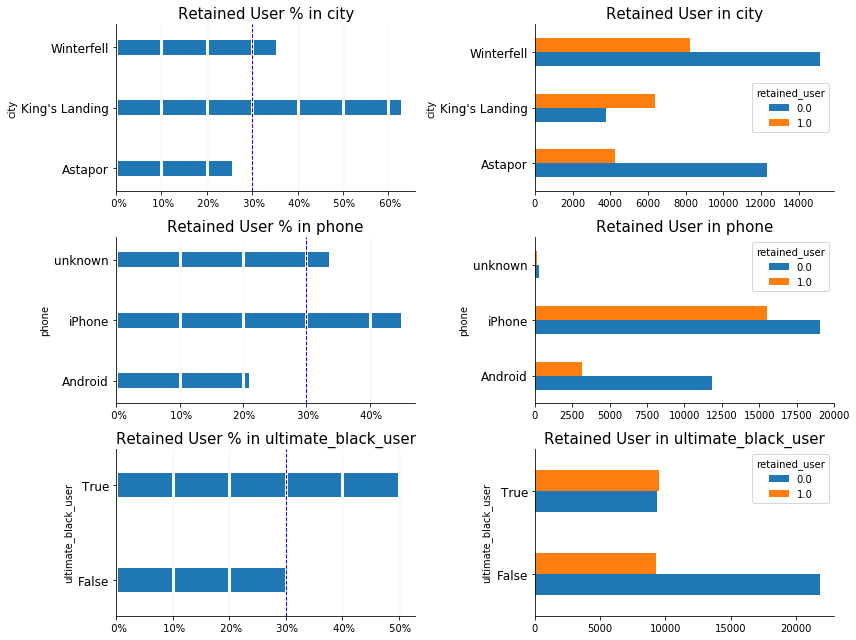

In [183]:
# visualize the catrgoty feature
cols = ['city', 'phone', 'ultimate_black_user']
fig = plt.figure(figsize = (12,9))

i = 1
for col in cols:
    crosstab = pd.crosstab([user[col]], user.retained_user).apply(lambda r: 100*r/r.sum(), axis=1)
    ax = fig.add_subplot(3,2,i)
    crosstab.iloc[:,1].plot.barh(width = 0.25 , ax= ax)
    ax.grid(True, which='major', axis='x', color=(250/255.0, 250/255.0, 250/255.0), linewidth=3, zorder=1)
    ax.axvline(x=30, color="blue", linestyle='--', linewidth=1)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.set_title('Retained User % in '+ col, fontdict={'fontsize':15})
    ax.tick_params(axis="y", labelsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    i += 2

 
    
j = 2
for col in cols:
    crosstab = pd.crosstab(user[col], user.retained_user) 
    ax = fig.add_subplot(3,2,j)
    crosstab.plot.barh(stacked=False, legend=True, ax=ax )
    ax.set_title('Retained User in '+ col, fontdict={'fontsize':15})
    ax.tick_params(axis="y", labelsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    j += 2


plt.tight_layout()
plt.show()

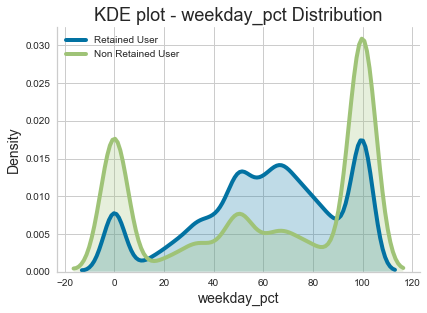

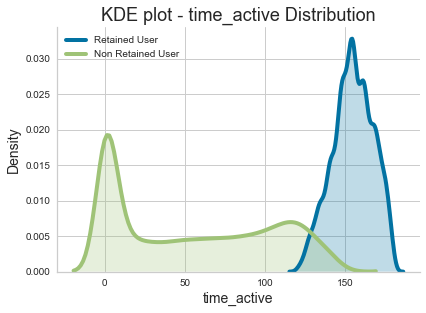

In [223]:
def kde_plot(col):
    fig = plt.figure(figsize = (6.5,4.5))

    ax = sns.kdeplot(data=user.loc[:,col][user.retained_user == 1], 
                     label = 'Retained User', linewidth=4, shade=True)
    ax = sns.kdeplot(data=user.loc[:,col][user.retained_user == 0],
                     label = 'Non Retained User',linewidth=4, shade=True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.xlabel(col, fontdict={'fontsize':14})
    plt.ylabel('Density', fontdict={'fontsize':14})
    plt.title("KDE plot - "+col+ " Distribution",fontdict={'fontsize':18})
    plt.show()
    

for col in ['weekday_pct', 'time_active']:   
    kde_plot(col)

# Summary

>1. 37% of observed users were retained.
>2. Retained users fraction varies among the factors of `city`, `phone` and `ultimate_black_user`.
>     - `city`: The city King's Landing obtains the highest retained users among all - up to 62%.
>     - `phone`: iPhone users have almost twice (40%+) retain percentage than Android users (20%+).
>     - `ultimate_black_user`: The ultimate black user group have 50% retains fraction vs. those are not (20%).<br>
>3. The retained users have much longer active time (centered at 150 days) than those who are not.

         


# Build a Predictive Model

In [217]:
from imblearn.pipeline import Pipeline as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import DiscriminationThreshold

Using TensorFlow backend.


In [218]:
# define plot function
#Define the plot Function
def result(model, X_train, y_train, X_test, y_test, train_result, clf_name):
    """ This function calculates different metrics to show the model's performance on both training and test data.
    This functoin also shows the confusion matrix, and plots the ROC and PR curves.
    
    Parameters
    ----------
    model (dtype: sklearn.model_selection._search.GridSearchCV) : The classifier model
    train_result (dtype: boolean): If YES, calculate results for train data
    clf_name (dtype: str): Name of the classifier
    """
    if train_result:
        y_pred_train = model.predict(X_train) # class prediction
        y_pred_train_prob = model.predict_proba(X_train) # probability of each class prediction
        print("#######################################")
        print("Evaluation Metrics for %s" % clf_name)
        print("#######################################")
        print("F1: ", metrics.f1_score(y_train, y_pred_train))
        print("Cohen Kappa: ", metrics.cohen_kappa_score(y_train, y_pred_train))
        print("Brier: ", metrics.brier_score_loss(y_train, y_pred_train))
        print("LogLoss: ", metrics.log_loss(y_train, y_pred_train_prob))
        print(metrics.classification_report(y_train, y_pred_train))
        print(metrics.confusion_matrix(y_train, y_pred_train))
    else:
        pass
    
    y_pred_test = model.predict(X_test)
    y_pred_test_prob = model.predict_proba(X_test)
    print("#######################################")
    print("Evaluation Metrics for %s" % clf_name )
    print("#######################################")
    print("F1: ", metrics.f1_score(y_test, y_pred_test))
    print("Cohen Kappa: ", metrics.cohen_kappa_score(y_test, y_pred_test))
    print("Brier: ", metrics.brier_score_loss(y_test, y_pred_test))
    print("LogLoss: ", metrics.log_loss(y_test, y_pred_test_prob))
    print(metrics.classification_report(y_test, y_pred_test))
    conf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
    
    fig = plt.figure(figsize = (20,6))
    # Displaying the confusion matrix
    ax = fig.add_subplot(1,3,1)
    #fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', fontsize=24)

    ax.set_title('Confusion Matrix', size=15)
    ax.set_xlabel('Predicted label', size=15)
    ax.set_ylabel('True label', size=15)
    ax.tick_params('x', labelsize = 15)
    ax.tick_params('y', labelsize = 15)
    #plt.tight_layout()
    
    # ROC curve
    ax = fig.add_subplot(1,3,2)
    #fig1, ax1 = plt.subplots(figsize=(8, 8))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=1, label='Model Performance (area = %0.2f)' % (roc_auc))
    ax.plot([0, 1], 
             [0, 1], 
             '--', 
             color=(0.6, 0.6, 0.6), 
             label='Luck')
    
    ax.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2,
             linestyle=':',
             color='black',
             label='Perfect Performance')
        
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    ax.set_xlabel('False Positive Rate', size=15)
    ax.set_ylabel('True Positive Rate', size=15)
    ax.set_title('Receiver Operating Characteristic', size=15)
    ax.tick_params('x', labelsize = 15)
    ax.tick_params('y', labelsize = 15)
    plt.legend(loc="lower right", fontsize=18)
    
    # PR curve
    ax = fig.add_subplot(1,3,3)
    #fig2, ax2 = plt.subplots(figsize=(8, 8))
    prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob[:, 1])
    #pr_auc = auc(prec, recall)
    ax.plot(recall, prec, lw=1, label='Model Performance (area = %0.2f)' % 
             (metrics.average_precision_score(y_test, y_pred_test_prob[:, 1])))    
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    ax.set_xlabel('Recall', size=15)
    ax.set_ylabel('Precision', size=15)
    ax.set_title('PR Curve', size=15)
    ax.tick_params('x', labelsize = 15)
    ax.tick_params('y', labelsize = 15)
    plt.legend(loc="top right", fontsize=15)
    plt.tight_layout()

### Preprocess the Data

In [257]:
# processing data to use
feature_to_use = user.drop(['signup_date','last_trip_date'], axis=1)

feature_to_use['retained_user'] = feature_to_use['retained_user'].astype('int')
        
feature_to_use_transfmd = pd.get_dummies(feature_to_use)
X = feature_to_use_transfmd.drop(["retained_user"], axis=1).values
y = feature_to_use_transfmd.retained_user.values

# train-test split by stratificaiton
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

### Random Forest - Baseline Model

In [259]:
# Steps for pipeline
steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", RandomForestClassifier(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__n_estimators = [100, 500, 700, 1000],
                  model__max_features = ['sqrt', 'log2'],
                  model__min_samples_leaf = [1, 2, 5])

# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
RFbase = GridSearchCV(pipe, 
                    param_grid = param_grid, 
                    verbose = 3,
                    cv = cv,
                    n_jobs=-1,
                    scoring='average_precision',
                    iid=False)

# Training using CV
RFbase.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 54.9min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=20, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_node...
         

In [261]:
RFbase.best_params_

{'model__max_features': 'sqrt',
 'model__min_samples_leaf': 5,
 'model__n_estimators': 500}

#######################################
Evaluation Metrics for RF, Baseline
#######################################
F1:  0.9452907669890052
Cohen Kappa:  0.9121214220651916
Brier:  0.0413
LogLoss:  0.09649829304351754
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6239
           1       0.94      0.95      0.95      3761

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



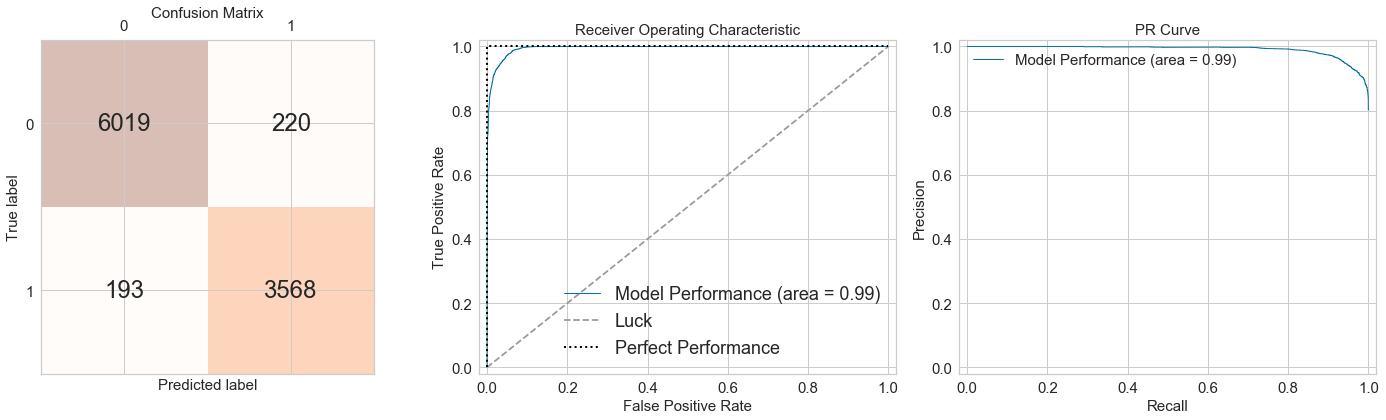

In [262]:
result(RFbase, X_train, y_train, X_test, y_test, train_result=False, clf_name="RF, Baseline")

### Random Forest - Optimized SMOTE Model

In [264]:
#Steps for pipeline
steps = [("smote", SMOTE(random_state=30)),
         ("scaler",MinMaxScaler(feature_range=(0,1))),
         ("model", RandomForestClassifier(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__n_estimators = [500],
                  model__max_features = ['sqrt'],
                  model__min_samples_leaf = [5])

# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
RFsmote = GridSearchCV(pipe, 
                       param_grid = param_grid, 
                       verbose = 4,
                       cv = cv,
                       n_jobs=-1,
                       scoring='average_precision',
                       iid=False)

# Training using CV
RFsmote.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.4min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=20, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=30,
                                              sampling_strategy='auto')),
                                       ('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0...
                                                               min_weight_fraction_leaf=0.0,
                                                            

#######################################
Evaluation Metrics for RF, SMOTE
#######################################
F1:  0.9458854509545753
Cohen Kappa:  0.912758583769972
Brier:  0.0411
LogLoss:  0.09525013511806095
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6239
           1       0.94      0.96      0.95      3761

    accuracy                           0.96     10000
   macro avg       0.95      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



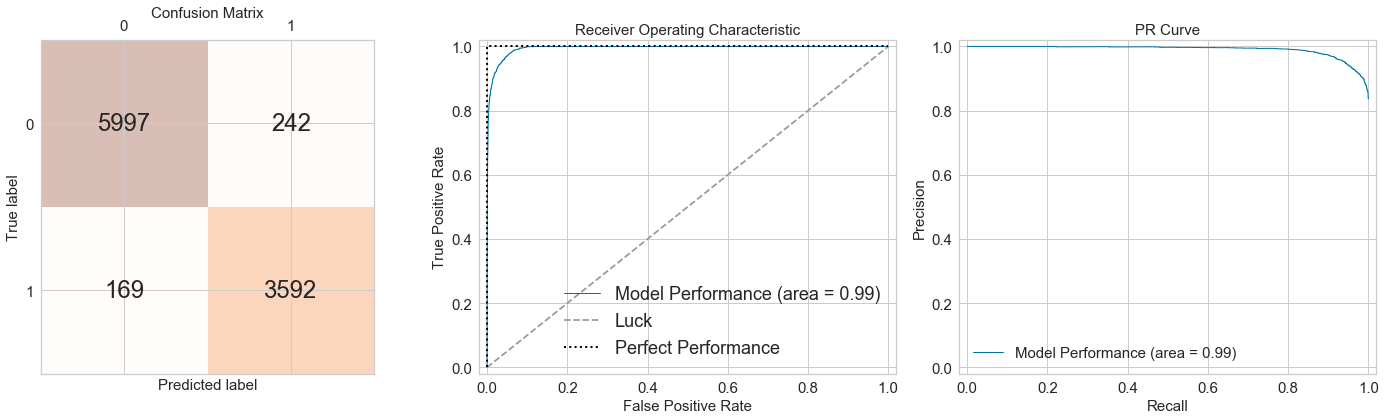

In [265]:
result(RFsmote, X_train, y_train, X_test, y_test, train_result=False, clf_name="RF, SMOTE")

### Feature Importance

In [267]:
# refit the smote 
param_grid = {'n_estimators': [500]}
rf = RandomForestClassifier(max_features = 'sqrt',
                            min_samples_leaf  = 5,
                            random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 3, 
                           n_jobs = -2, 
                           verbose = 2,
                           return_train_score = True)
                           

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_
feature_results = pd.DataFrame({'feature': list(feature_to_use_transfmd.drop(["retained_user"], axis=1).columns), 
                                'importance': best_grid.feature_importances_})

# Show the top most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
print(feature_results)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of   3 | elapsed:   44.1s finished


                      feature  importance
0                 time_active    0.796050
1        avg_rating_by_driver    0.043191
2                   surge_pct    0.027506
3         city_King's Landing    0.022776
4                   avg_surge    0.022577
5                 weekday_pct    0.019625
6                    avg_dist    0.012023
7      trips_in_first_30_days    0.011647
8               phone_Android    0.009049
9                phone_iPhone    0.008339
10       avg_rating_of_driver    0.006521
11  ultimate_black_user_False    0.006187
12   ultimate_black_user_True    0.006059
13               city_Astapor    0.005550
14            city_Winterfell    0.002863
15              phone_unknown    0.000038


# Summary

In this section, we build the random forest classifier to help us predict whether or not a user will be active in their 6th month on the system. 
1. We split the data as 80%-20% ratio for the train and test data, given the unbalanced retained users identified in the dataset (62% retained users - 38% non retained users), we applied the split with stratification.
2. Random forest was chosen as the predictive model, 5-fold cross-validation was combined with parameters tuning, then the model was optimized with the SMOTE technique and refitted with the best parameters.
3. We extract the features' importance, the top features are time active, which is the users active time at the platform.


# Take-Away Insights

>> 1. Both the Random Forest Baseline Model and the Random Forest SMOTE Model return the results that closed to a perfect prediction performance. Which means we can choose either one to predict the retained users.
>> 2. 3 features in our prediction model - `time active`, `average rate by driver`, and `surge pct`  - that stand out as top important features, which means in the long run platform monitoring, these should be a top priority that we will be looking at for insights.

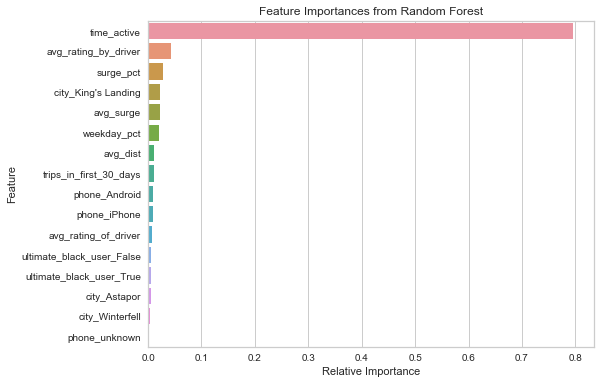

In [268]:
#plot the feature imortance
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', 
            data=feature_results)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()